In [3]:
import numpy as np
from spec_id import Scale_model, Cluster, Cluster_model,Cluster_fit_sim, Cluster_fit_sim_MC
import matplotlib.pyplot as plt
from matplotlib import gridspec
from vtl.Readfile import Readfile
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [3]:
'''Construct simulated cluster spectra'''
ngc=Cluster('../clusters/ngc6528_griz_err_1.1.npy',1.1)
ngc.Remove_continuum()
sim_gc = Cluster_model(0.015,11.0,0,1.1,ngc.nc_wv*(1 + ngc.redshift), ngc.nc_fl, ngc.nc_er)
sim_gc.Simulate_cluster()
sim_gc.Remove_continuum(use_sim=True)
sim_gc.Remove_continuum()

cmodel = Cluster_model(0.015,11.0,0,1.1, sim_gc.wv, sim_gc.fl, sim_gc.cluster_er)
cmodel.Remove_continuum()

In [16]:
sim_gc.Simulate_cluster()
sim_gc.Remove_continuum(use_sim=True)

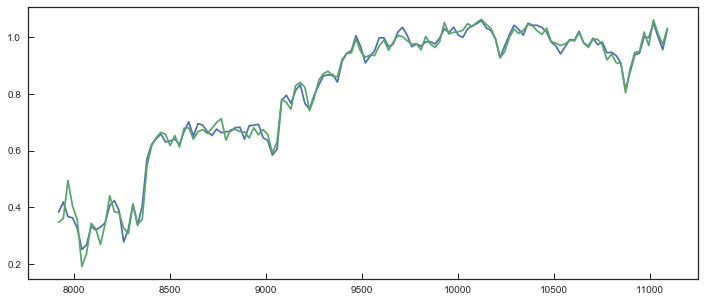

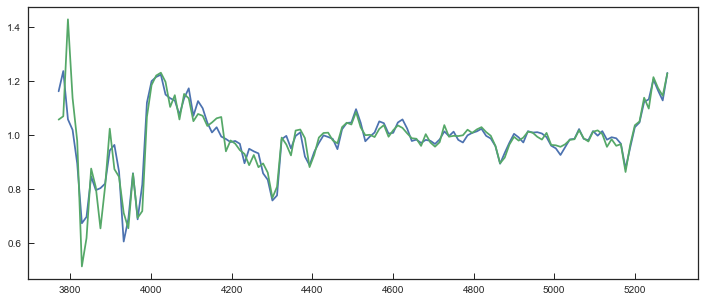

In [17]:
'''check simulated spectra'''
%matplotlib inline

plt.figure(figsize=[12,5])
plt.plot(cmodel.wv,cmodel.fl)
plt.plot(sim_gc.simwv,sim_gc.simfl)
plt.show()
plt.close()

plt.figure(figsize=[12,5])
plt.plot(cmodel.nc_wv,cmodel.nc_fl)
plt.plot(sim_gc.nc_simwv,sim_gc.nc_simfl)
plt.show()
plt.close()

In [4]:
def Get_cont(wave,flux, z):
    IDx = [U for U in range(len(wave)) if 7500 < wave[U] < 11500]

    wv = wave[IDx]
    fl = flux[IDx]

    w = wv / (1 + z)

    m2r = [3800, 3850, 3910, 4030, 4080, 4125, 4250, 4385, 4515, 4570, 4810, 4910, 4975, 5055, 5110, 5285]

    Mask = np.zeros(len(w))
    for i in range(len(Mask)):
        if m2r[0] <= w[i] <= m2r[1]:
            Mask[i] = 1
        if m2r[2] <= w[i] <= m2r[3]:
            Mask[i] = 1
        if m2r[4] <= w[i] <= m2r[5]:
            Mask[i] = 1
        if m2r[6] <= w[i] <= m2r[7]:
            Mask[i] = 1
        if m2r[8] <= w[i] <= m2r[9]:
            Mask[i] = 1
        if m2r[8] <= w[i] <= m2r[9]:
            Mask[i] = 1
        if m2r[10] < w[i] <= m2r[11]:
            Mask[i] = 1
        if m2r[12] <= w[i] <= m2r[13]:
            Mask[i] = 1
        if m2r[14] <= w[i] <= m2r[15]:
            Mask[i] = 1

    maskw = np.ma.masked_array(w, Mask)

    params = np.ma.polyfit(maskw, fl, 3)
    C0 = np.polyval(params, w)

    return w*(1+z), C0

In [5]:
mwv,Cm = Get_cont(sim_gc.wv,sim_gc.fl,1.1)
swv,Cs = Get_cont(sim_gc.simwv,sim_gc.simfl,1.1)

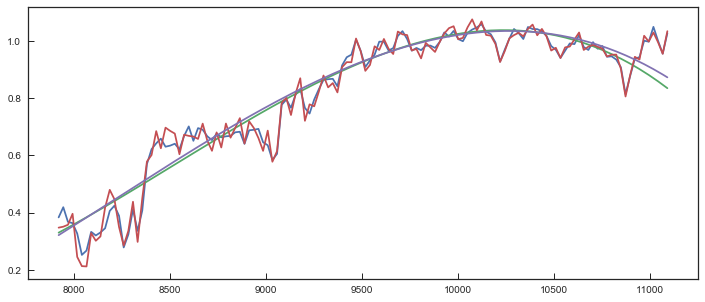

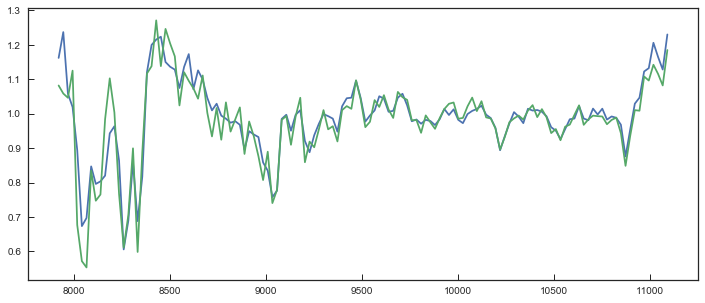

In [6]:
plt.figure(figsize=[12,5])
plt.plot(sim_gc.wv,sim_gc.fl)
plt.plot(mwv,Cm)
plt.plot(sim_gc.simwv,sim_gc.simfl)
plt.plot(swv,Cs)
plt.show()
plt.close()

plt.figure(figsize=[12,5])
plt.plot(sim_gc.wv,sim_gc.fl/Cm)
plt.plot(sim_gc.simwv,sim_gc.simfl/Cs)
plt.show()
plt.close()

In [8]:
metal=np.arange(0.002,0.031,0.001)
tau=[0]
age=np.arange(.5,14.1,.1)

Cluster_fit_sim('../clusters/ngc6528_griz_err_1.1.npy',0.015,11.0,0,metal,age,tau,1.1,'sim6528_1.1')

Done!


(29, 136)
(136,)
[[92 14]]
Best fit model is 9.7 Gyr and 0.016 Z


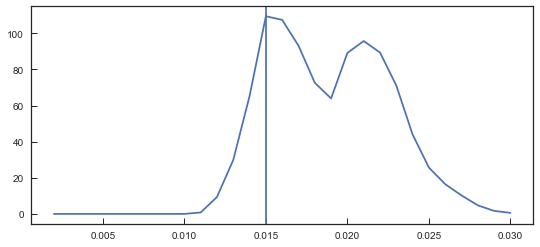

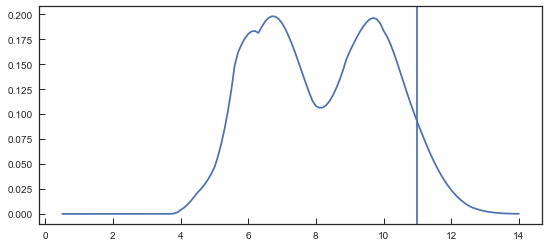

(29, 136)
(136,)
[[104  13]]
Best fit model is 10.9 Gyr and 0.015 Z


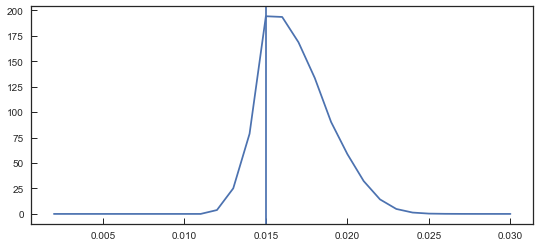

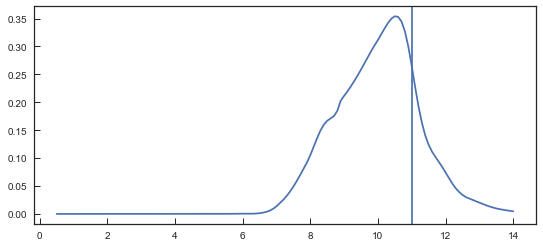

In [9]:
%matplotlib inline
ngc=Cluster('../clusters/ngc6528_griz_err_1.1.npy',1.1)
ngc.Analyze_fit('../chidat/sim6528_1.1_sim_nc_chidata.fits',metal,age,tau)

plt.figure(figsize=[9,4])
plt.plot(metal,ngc.MP)
plt.axvline(0.015)
plt.show()
plt.close()

plt.figure(figsize=[9,4])
plt.plot(age,ngc.AP)
plt.axvline(11.0)
plt.show()
plt.close()

ngc.Analyze_fit('../chidat/sim6528_1.1_sim_chidata.fits',metal,age,tau)
plt.figure(figsize=[9,4])
plt.plot(metal,ngc.MP)
plt.axvline(0.015)
plt.show()
plt.close()

plt.figure(figsize=[9,4])
plt.plot(age,ngc.AP)
plt.axvline(11.0)
plt.show()
plt.close()

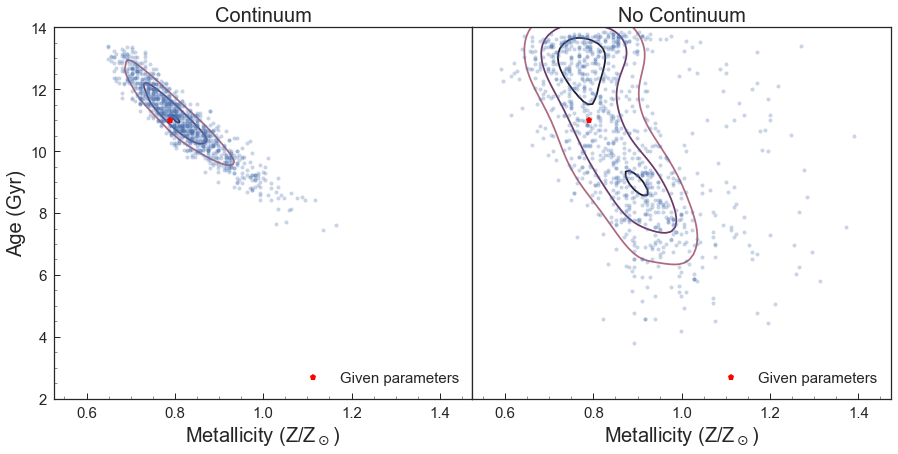

In [12]:
%matplotlib inline
colmap = sea.cubehelix_palette(12, start=3, rot=0.5, dark=0.1, light=.5, as_cmap=True)
mlist,alist = np.load('../mcerr/sim6528_1.1_mcerr.npy')
ncmlist,ncalist = np.load('../mcerr/sim6528_1.1_nc_mcerr.npy')

gs = gridspec.GridSpec(1,2,hspace=0,wspace=0)

plt.figure(figsize=[15,8])
plt.subplot(gs[0])
plt.plot(mlist/.019,alist,'o',alpha=.3,ms=4)
sea.kdeplot(mlist/.019,alist,n_levels=3,cmap=colmap)
plt.plot(0.015/.019,11,'rp',label='Given parameters')
plt.axis([0.01/.019,.028/.019,2,14])
plt.xlabel('Metallicity (Z/Z$_\odot$)',fontsize = 20)
plt.ylabel('Age (Gyr)',fontsize = 20)
plt.title('Continuum',fontsize = 20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gcf().subplots_adjust(bottom=0.235)
plt.legend(loc=4,fontsize=15)
plt.minorticks_on()
# plt.show()
# plt.close()

# plt.figure(figsize=[8,8])
plt.subplot(gs[1])
plt.plot(ncmlist/.019,ncalist,'o',alpha=.3,ms=4)
sea.kdeplot(ncmlist/.019,ncalist,n_levels=3,cmap=colmap)
plt.plot(0.015/.019,11,'rp',label='Given parameters')
plt.axis([0.01/.019,.028/.019,2,14])
plt.xlabel('Metallicity (Z/Z$_\odot$)',fontsize = 20)
# plt.ylabel('Age (Gyr)',fontsize = 20)
plt.title('No Continuum',fontsize = 20)
plt.yticks([])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gcf().subplots_adjust(bottom=0.235)
plt.legend(loc=4,fontsize=15)
plt.minorticks_on()
plt.show()
plt.close()